# 1 Google Play Store Apps and Reviews

Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.

Let's take a look at the data, which consists of two files:

1. apps.csv: contains all the details of the applications on Google Play. There are 13 features that describe a given app.

2. user_reviews.csv: contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.

<img src = "https://assets.datacamp.com/production/project_619/img/google_play_store.png">

### 1.1 Import the Software Libraries

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1.2 Read the Apps Dataset

In [134]:
app = pd.read_csv("./datasets/apps.csv")

### 1.3 Print the first five rows

In [135]:
app.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [136]:
# Output :-

### 1.4 Drop the Unnamed: 0 Column

In [137]:
app =app.drop(labels='Unnamed: 0', axis=1)
app

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
9656,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
9657,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [138]:
# Output

### 1.5 Print the Number of rows and columns

In [139]:
print(app.shape)

(9659, 13)


In [140]:
# Output :-

### 1.6 Print the Basic Information of the dataset

In [141]:
print(app.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 981.1+ KB
None


In [142]:
# Output :-

### 1.7 Check for the Duplicated Values

- If there are duplicated values, then drop them.

In [143]:
app.duplicated().sum()

0

In [144]:
# Output :-

### 1.8 Check for the Missing Values

- Just check.
- How many missing values for each column?

In [145]:
app.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [146]:
# Output :-

# 2 Data Cleaning

### 2.1 Drop the missing data from Current ver and Android Ver

- If you want to impute them, it is ok.

In [147]:
app = app.dropna(subset=['Current Ver', 'Android Ver'])
app.isnull().sum()

App                  0
Category             0
Rating            1459
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [148]:
# Output :-

### 2.2 Handle the missing data from Size

- First Check the distribution of the size variable using matplotlib.
- Second choose the best method to impute the data.
- Lastly, Check the distribution again.

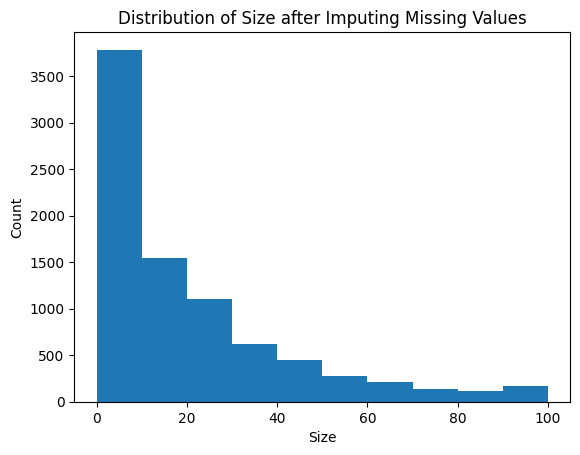

In [149]:
plt.hist(app['Size'])
plt.xlabel('Size')
plt.ylabel('Count')
plt.title('Distribution of Size after Imputing Missing Values')
plt.show()

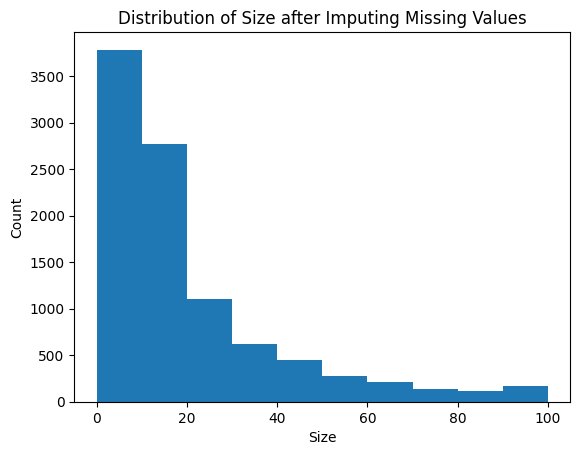

App                  0
Category             0
Rating            1459
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [150]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
app.loc[:,'Size'] = imputer.fit_transform(app[['Size']])
plt.hist(app['Size'])
plt.xlabel('Size')
plt.ylabel('Count')
plt.title('Distribution of Size after Imputing Missing Values')
plt.show()
app.isnull().sum()

In [151]:
# Output :-

### 2.3 Handle the missing data from Rating

- Because it is a rating feature, there are a lot of methods we can do to impute this feature, such as using another data that contains the reviews (every rating for each app) then analyze the sentiment using NLP, or do another methods (you can search for this situation).
- But, now choose the suitable method for imputation that is easy and good.

In [152]:
mean_rating = app['Rating'].mean()
app.loc[app['Rating'].isnull(), 'Rating'] = mean_rating
app.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [111]:
# Output :-

### 2.4 Check the values of both Installs and Price columns

- What did you notice??
- List three notifications for both columns (maybe shared notifications).

In [153]:
ins=pd.Series(app['Installs'].value_counts(),index=app['Installs'])
ins.drop_duplicates(inplace=True)
ins.sort_values(ascending=False,inplace=True)
ins

Installs
1,000,000+        1416
100,000+          1112
10,000+           1029
10,000,000+        937
1,000+             886
100+               709
5,000,000+         607
500,000+           504
50,000+            468
5,000+             467
10+                384
500+               328
50+                204
50,000,000+        202
100,000,000+       188
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
0                    1
Name: count, dtype: int64

In [113]:
# Output :-

In [154]:
p=pd.Series(app['Price'].value_counts(),index=app['Price'])
p.drop_duplicates(inplace=True)
p.sort_values(ascending=False,inplace=True)
p

Price
0          8896
$0.99       143
$2.99       124
$1.99        73
$4.99        70
$3.99        57
$1.49        45
$5.99        26
$2.49        25
$9.99        19
$399.99      12
$6.99        11
$14.99        9
$7.99         7
$5.49         5
$12.99        4
$24.99        3
$7.49         2
$9.00         1
Name: count, dtype: int64

In [115]:
# Output :-

### 2.5 Check the values for each of the object data type column

- Do not check the Installs and Price columns, we have did this before.
- Make a list that contains the columns that are good to stay as an object.
- Make a list that contains list the columns that are need to convert to categorical.
- Make a list that contains list the columns that are need to convert to Integers.
- Make a list that contains list the columns that are need to convert to Date.

In [155]:
ob = ["App",'Type']
categorical=['Category','Genres', 'Content Rating']
Integers= ['Reviews']
Date=["Last Updated"]

### 2.6 Clean the Installs and Price columns

- Remove unwanted characters.

In [156]:
app['Installs'] = app['Installs'].str.replace(',', '').str.replace('+', '')
ins

C:\Users\HP\AppData\Local\Temp\ipykernel_14864\994125686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app['Installs'] = app['Installs'].str.replace(',', '').str.replace('+', '')


Installs
1,000,000+        1416
100,000+          1112
10,000+           1029
10,000,000+        937
1,000+             886
100+               709
5,000,000+         607
500,000+           504
50,000+            468
5,000+             467
10+                384
500+               328
50+                204
50,000,000+        202
100,000,000+       188
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
0                    1
Name: count, dtype: int64

In [78]:
# Output :-

In [157]:
app["Price"] = app["Price"].str.replace('$', '')
p

C:\Users\HP\AppData\Local\Temp\ipykernel_14864\2620299831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app["Price"] = app["Price"].str.replace('$', '')


Price
0          8896
$0.99       143
$2.99       124
$1.99        73
$4.99        70
$3.99        57
$1.49        45
$5.99        26
$2.49        25
$9.99        19
$399.99      12
$6.99        11
$14.99        9
$7.99         7
$5.49         5
$12.99        4
$24.99        3
$7.49         2
$9.00         1
Name: count, dtype: int64

In [80]:
# Output :-

### 2.7 Convert the data type of each object data type columns

- That is including Installs and Price columns.
- Build a function that receives 3 parameters
    1. List of columns you want to convert.
    2. Dataset which in our case the android apps.
    3. Data type that you want to convert to.
- In the function, loop through each column from the list.
- Use df[col].astype(data_type) function to convert the columns.
- Note : The list of date columns need not included in this step.

In [158]:
def convert_col_data_type(lst_of_cols, dataset, data_type):
    for col in lst_of_cols:
        dataset[col] = dataset[col].astype(data_type)
    return dataset
pr=["Price"]
convert_col_data_type(categorical, app, "category")
convert_col_data_type(Integers, app, "int")
convert_col_data_type(pr, app, "float")

C:\Users\HP\AppData\Local\Temp\ipykernel_14864\3798293737.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[col] = dataset[col].astype(data_type)
C:\Users\HP\AppData\Local\Temp\ipykernel_14864\3798293737.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[col] = dataset[col].astype(data_type)
C:\Users\HP\AppData\Local\Temp\ipykernel_14864\3798293737.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,Sya9a Maroc - FR,FAMILY,4.500000,38,53.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3.6,100,Free,0.0,Everyone,Education,"July 6, 2018",1,4.1 and up
9656,Parkinson Exercices FR,MEDICAL,4.173321,3,9.5,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1,2.2 and up
9657,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114,12.0,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


### 2.8 Convert the list of date columns into a suitable format.

- Use pd.to_datetime(df[col]) function.

In [159]:
app['Last Updated']=pd.to_datetime(app['Last Updated'])
app.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9649 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9649 non-null   object        
 1   Category        9649 non-null   category      
 2   Rating          9649 non-null   float64       
 3   Reviews         9649 non-null   int32         
 4   Size            9649 non-null   float64       
 5   Installs        9649 non-null   object        
 6   Type            9649 non-null   object        
 7   Price           9649 non-null   float64       
 8   Content Rating  9649 non-null   category      
 9   Genres          9649 non-null   category      
 10  Last Updated    9649 non-null   datetime64[ns]
 11  Current Ver     9649 non-null   object        
 12  Android Ver     9649 non-null   object        
dtypes: category(3), datetime64[ns](1), float64(3), int32(1), object(5)
memory usage: 826.3+ KB


C:\Users\HP\AppData\Local\Temp\ipykernel_14864\977534289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app['Last Updated']=pd.to_datetime(app['Last Updated'])


In [20]:
# Output :-

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9649 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9649 non-null   object        
 1   Category        9649 non-null   category      
 2   Rating          9649 non-null   float64       
 3   Reviews         9649 non-null   int64         
 4   Size            9649 non-null   float64       
 5   Installs        9649 non-null   int64         
 6   Type            9649 non-null   object        
 7   Price           9649 non-null   float64       
 8   Content Rating  9649 non-null   category      
 9   Genres          9649 non-null   category      
 10  Last Updated    9649 non-null   datetime64[ns]
 11  Current Ver     9649 non-null   object        
 12  Android Ver     9649 non-null   object        
dtypes: category(3), datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 864.0+ KB


# 3 Data Visualization

### 3.1 Plot the distribution for each categories using Bar Chart.

- The figure size is 16 by 8.
- Set the title, x label, and y label.
- Make sure that the names of the categories not overlapped (use xtricks method with some rotation value).

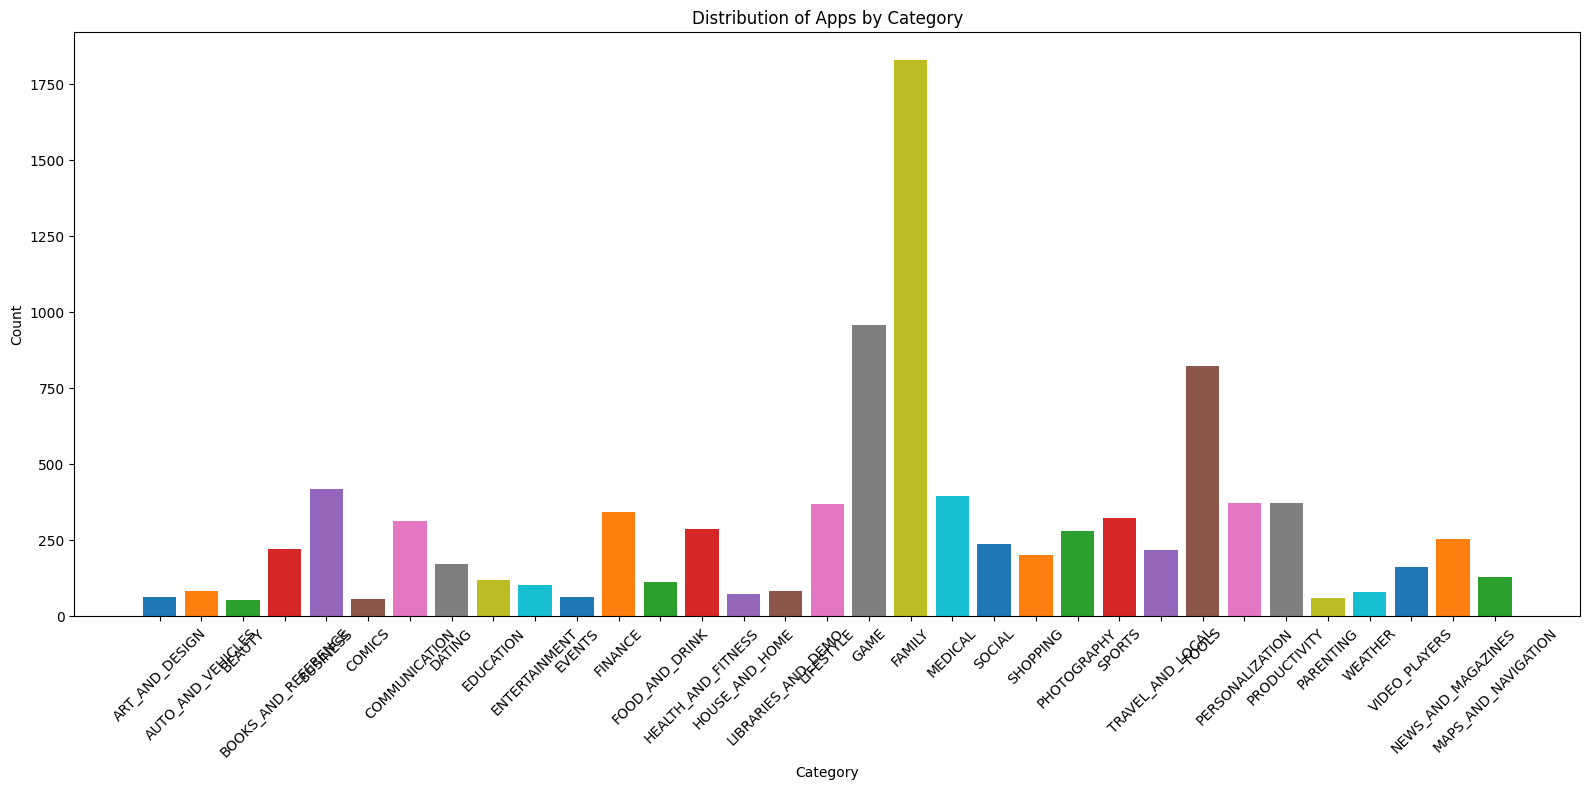

In [173]:
categories = app['Category'].unique()
fig, ax = plt.subplots(figsize=(16, 8))

ax.set_title('Distribution of Apps by Category')
ax.set_xlabel('Category')
ax.set_ylabel('Count')

for category in categories:
    ax.bar(category, app[app['Category'] == category].shape[0])

ax.set_xticks(categories)
ax.set_xticklabels(categories, rotation=45)

fig.tight_layout()

plt.show()

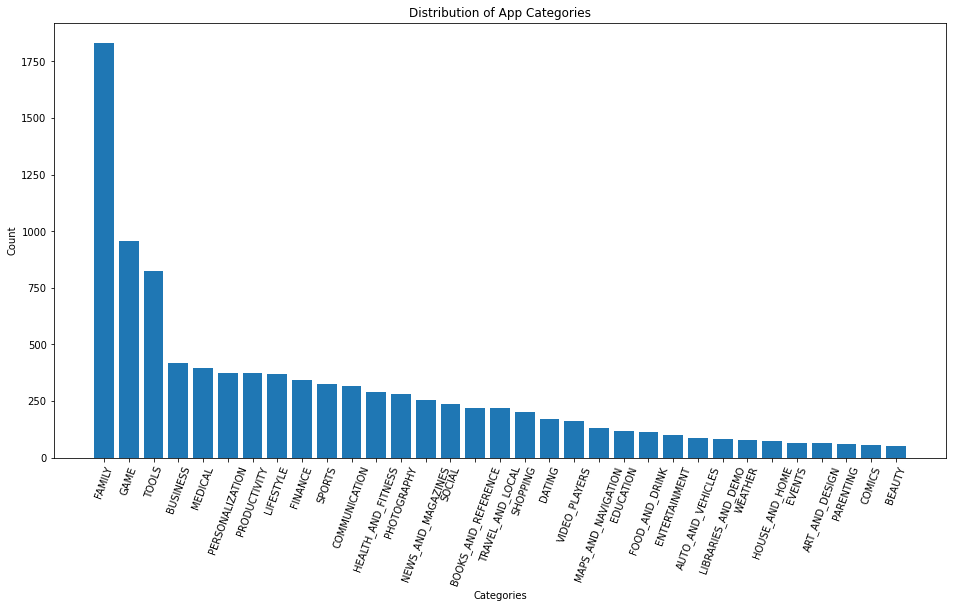

In [21]:
# Output :-

### 3.2 What are the categories has the heighest share of active apps?

- Use Bar Chart.
- Visualize the best 5 categories.

In [182]:
n_active_apps_per_category = app['Category'].value_counts()
top_5_categories = n_active_apps_per_category.index.tolist()[:33]
share_of_active_apps_per_category = n_active_apps_per_category[top_5_categories] / n_active_apps_per_category.sum()


print("Number of categories =",share_of_active_apps_per_category.count())

Number of categories = 33


In [22]:
# Output :-

Number of categories =  33


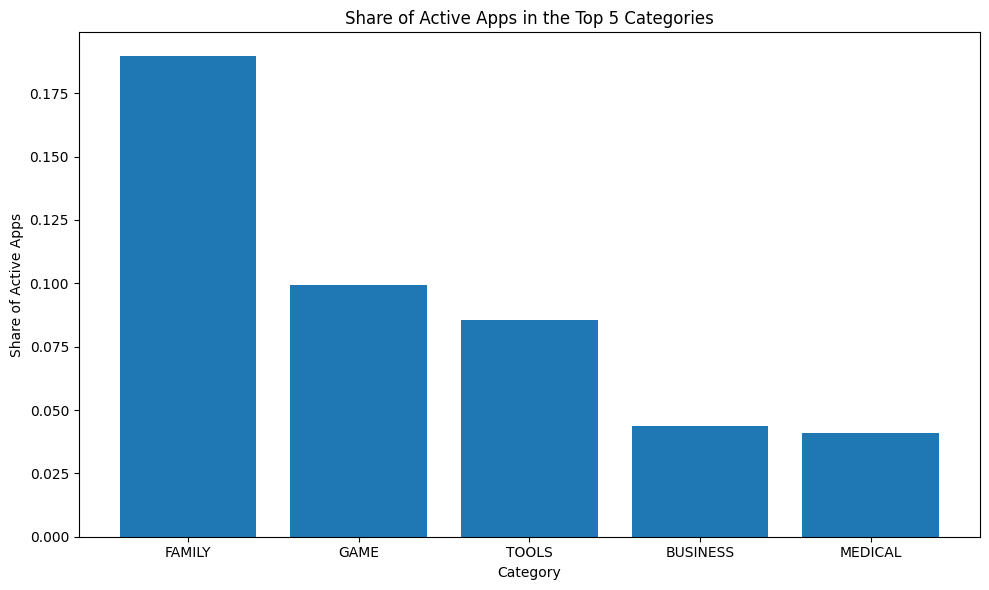

In [176]:
plt.figure(figsize=(10, 6))
plt.bar(top_5_categories, share_of_active_apps_per_category)
plt.xlabel('Category')
plt.ylabel('Share of Active Apps')
plt.title('Share of Active Apps in the Top 5 Categories')
plt.tight_layout()
plt.show()

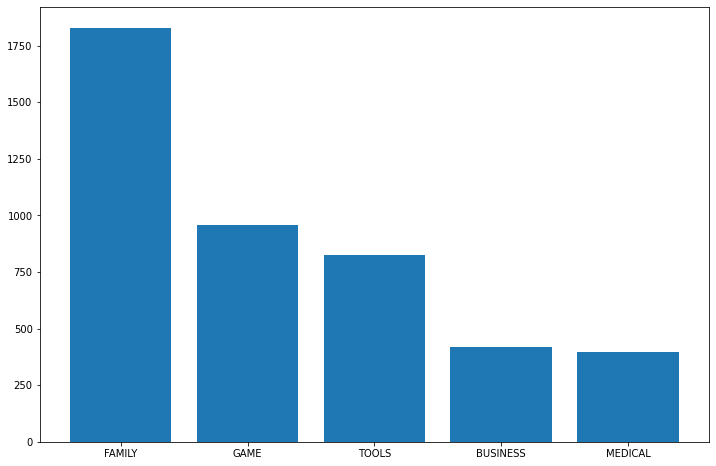

In [23]:
# Output :-

### 3.3 What are the categories has the lowest share of active apps?

- Use Bar Chart.
- Visualize the lowest 5 apps.

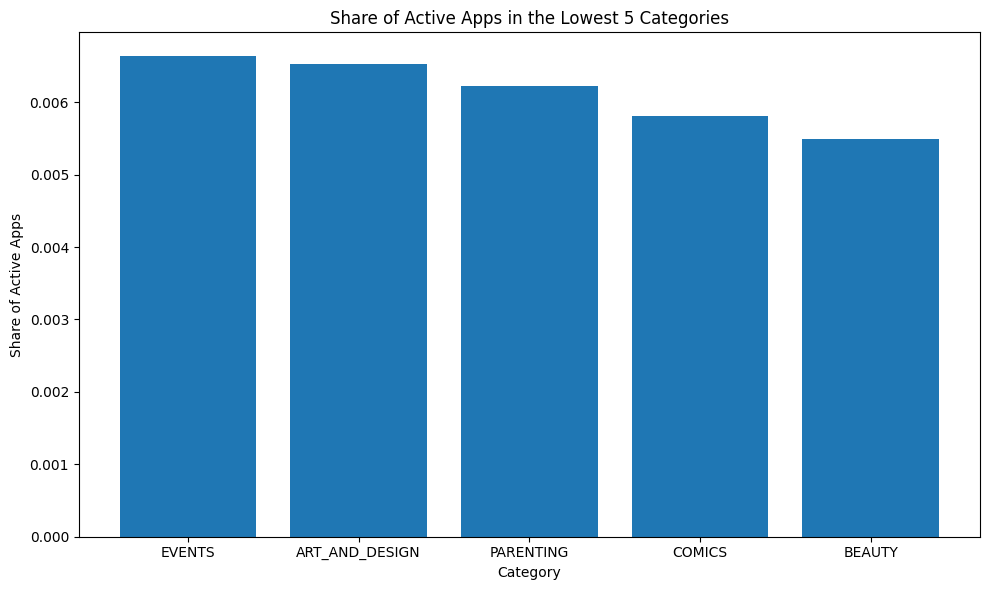

In [185]:
n_active_apps_per_category = app['Category'].value_counts()
bottom_5_categories = n_active_apps_per_category.index.tolist()[-5:]
share_of = n_active_apps_per_category[bottom_5_categories] / n_active_apps_per_category.sum()
plt.figure(figsize=(10, 6))
plt.bar(bottom_5_categories, share_of)
plt.xlabel('Category')
plt.ylabel('Share of Active Apps')
plt.title('Share of Active Apps in the Lowest 5 Categories')
plt.tight_layout()
plt.show()

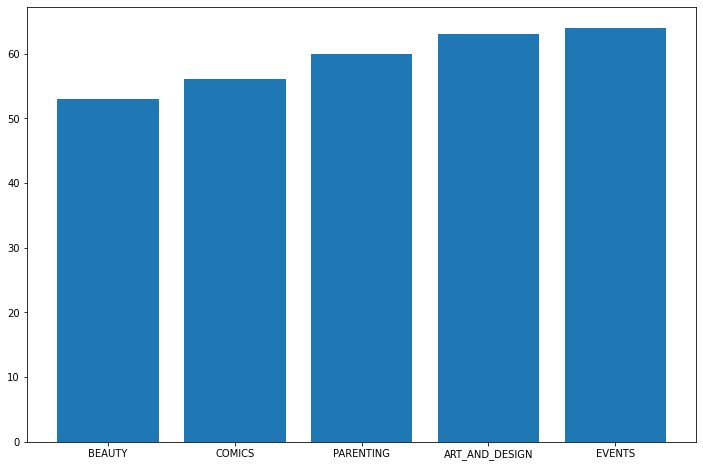

In [24]:
# Output :-

### 3.4 How does the app average rating vary across different categories?

- The figure size is 12 by 12.
- Use Horizontal Bar Chart.
- Set the title, x label, and y label.

C:\Users\HP\AppData\Local\Temp\ipykernel_14864\1047095436.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_app_rating_per_category = app.groupby('Category')['Rating'].mean()


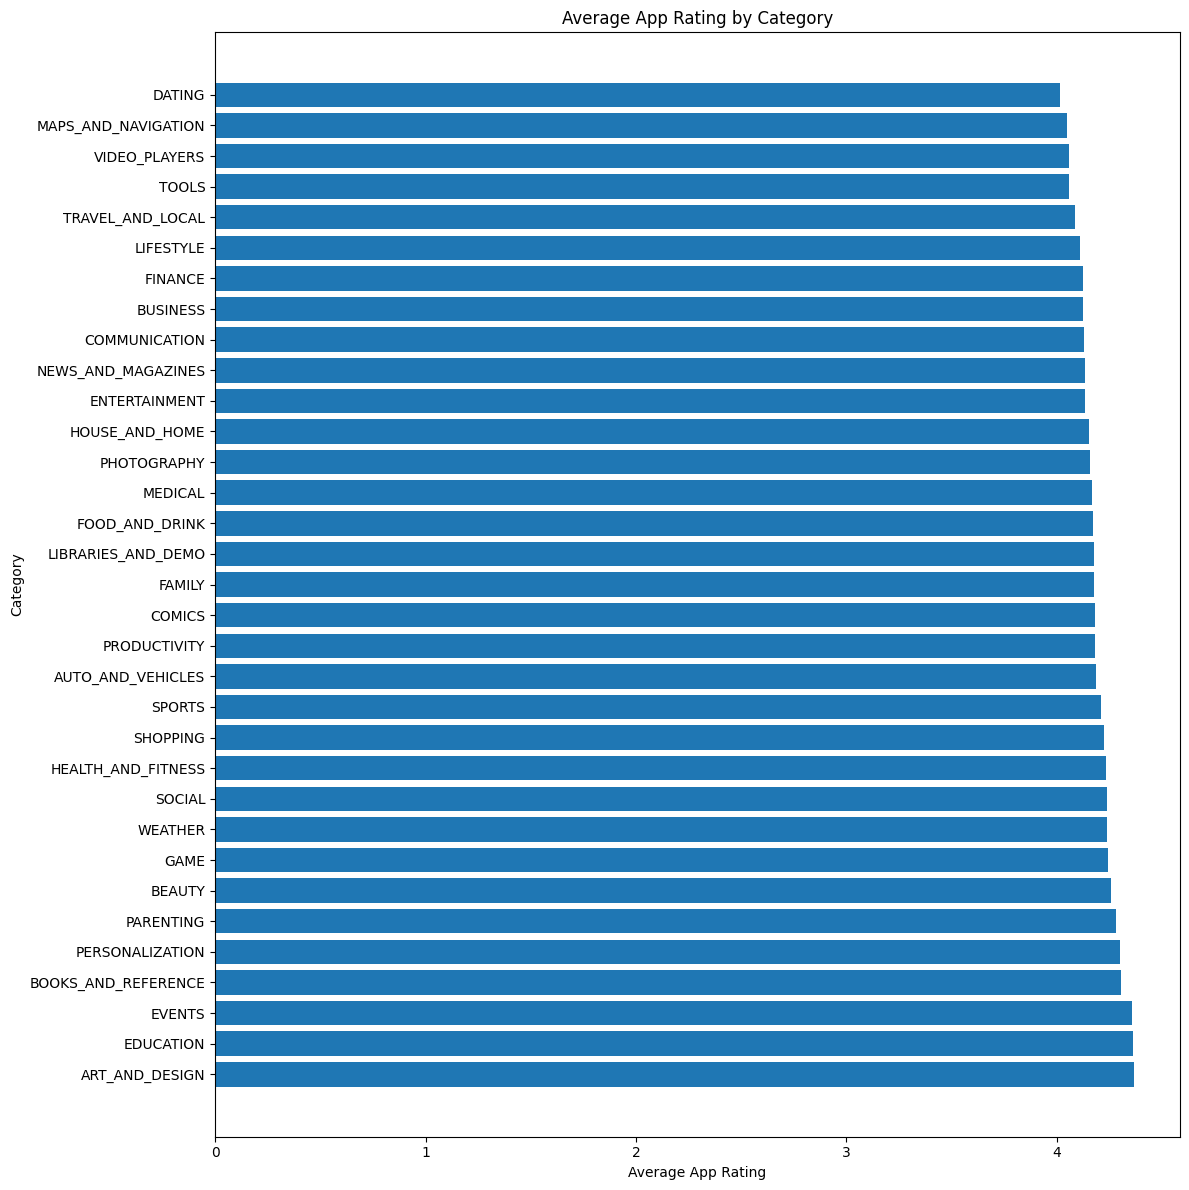

In [187]:
avg_app_rating_per_category = app.groupby('Category')['Rating'].mean()

avg_app_rating_per_category = avg_app_rating_per_category.sort_values(ascending=False)

plt.figure(figsize=(12, 12))
plt.barh(avg_app_rating_per_category.index, avg_app_rating_per_category.values)
plt.xlabel('Average App Rating')
plt.ylabel('Category')
plt.title('Average App Rating by Category')
plt.tight_layout()
plt.show()

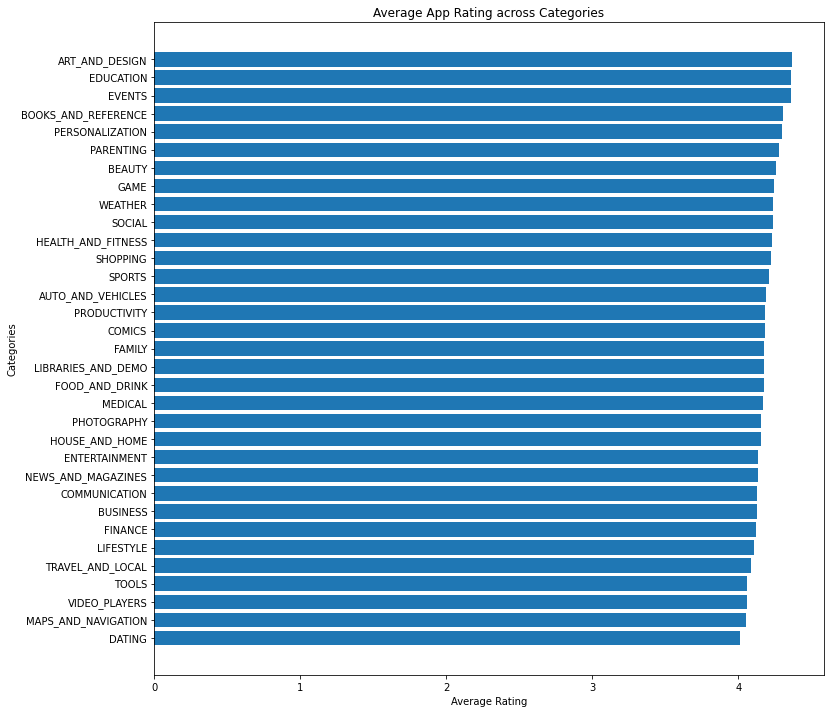

In [25]:
# Output :-

### 3.5 Plot the Average app size for each content rating distribution

- You need to use group by.
- Use Bar Plot.
- Set the width as 0.35.
- Label = 'Average size".
- Show the legend.
- Set the title, x label, and y label.

C:\Users\HP\AppData\Local\Temp\ipykernel_14864\1040592636.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_app = app.groupby('Content Rating')


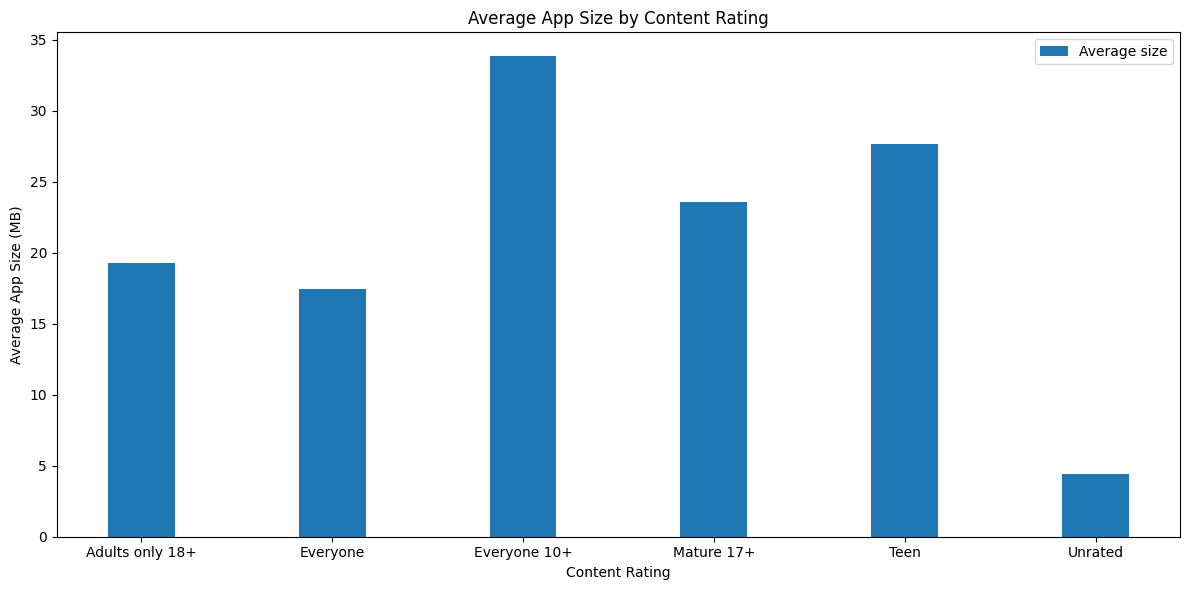

In [188]:
grouped_app = app.groupby('Content Rating')

avg_app_size_per_content_rating = grouped_app['Size'].mean()

plt.figure(figsize=(12, 6))
plt.bar(avg_app_size_per_content_rating.index, avg_app_size_per_content_rating.values, width=0.35, label='Average size')
plt.xlabel('Content Rating')
plt.ylabel('Average App Size (MB)')
plt.title('Average App Size by Content Rating')
plt.legend()
plt.tight_layout()
plt.show()

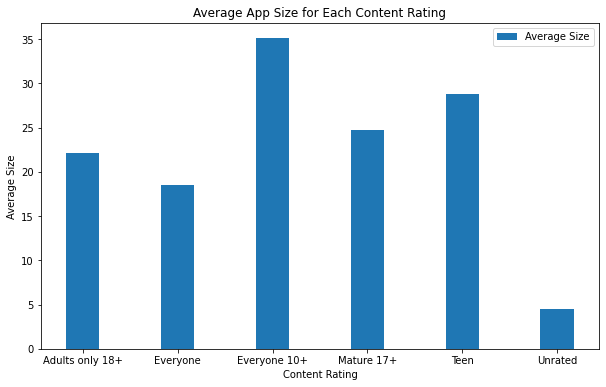

In [26]:
# Output :-

### 3.6 Common content ratings for different categories using a stacked bar chart.

<Figure size 1200x600 with 0 Axes>

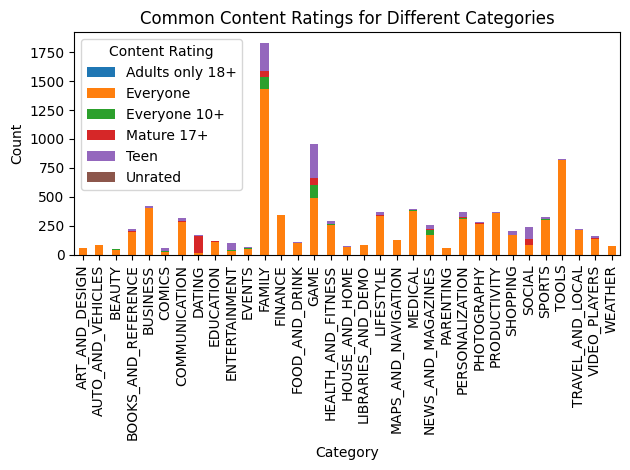

In [191]:
content_ratings = app['Content Rating'].unique()
pivot_table = pd.pivot_table(data=app, index=['Category'], columns=['Content Rating'], values='App', aggfunc='count')
plt.figure(figsize=(12, 6))
pivot_table.plot(kind='bar', stacked=True)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Common Content Ratings for Different Categories')
plt.legend(loc='upper left', title='Content Rating')
plt.tight_layout()
plt.show()

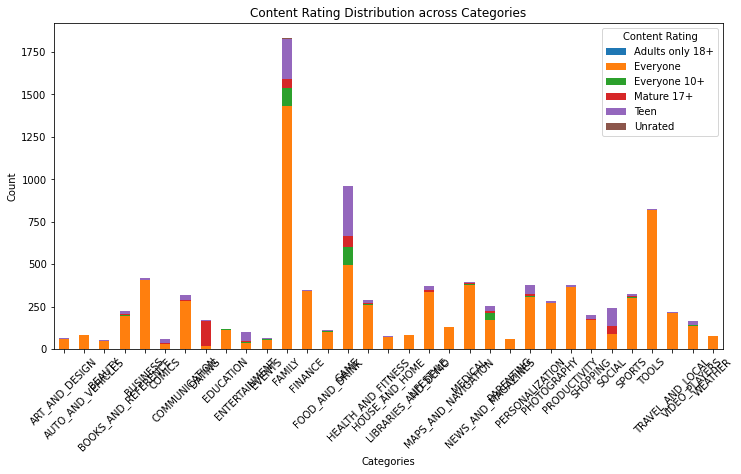

In [27]:
# Output :-

### 3.7 Use area plot to show the change in total reviews over the years.

- Extract the year from your date column as new column "Year".
- Use group by function.
- The figure size is 10 by 6.
- The color of the plot is "skyblue".
- The alpha is 0.4.
- Set the title, x label, and y label.

C:\Users\HP\AppData\Local\Temp\ipykernel_14864\178258439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app['Year'] = pd.to_datetime(app['Last Updated']).dt.year


AttributeError: module 'matplotlib.pyplot' has no attribute 'area'

<Figure size 1000x600 with 0 Axes>

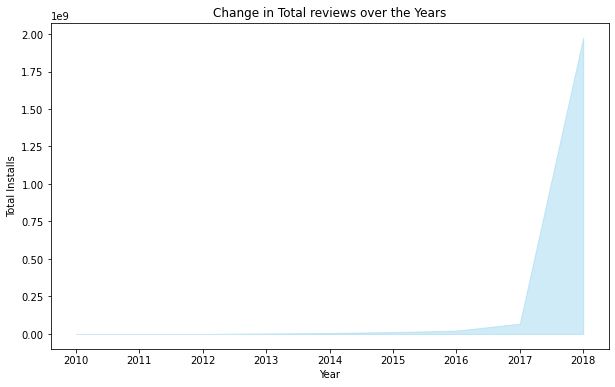

In [29]:
# Output :-

### 3.8 Use line plot to show the total Installs over the years.

- Use the same extracted year column.
- Use group by function.
- The figure size is 10 by 6.
- The color of the plot is "skyblue".
- The marker is 'o'.
- Set the title, x label, and y label.

In [ ]:
# Write your code here

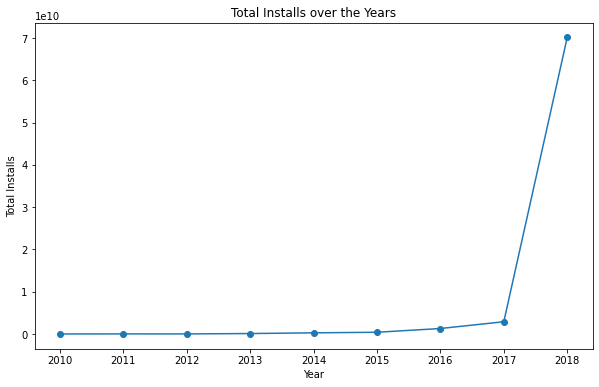

In [30]:
# Output :-

### 3.9 Make a subplot with four histograms

- Two rows and two columns.
- The first hist : Distribution of app sizes.
- The second hist : App rating distribution.
- The third hist : Distribution of app installs.
- The fourth hist : Distribution of app prices.
- Use 30 bins and different colors.

In [ ]:
# Write your code here

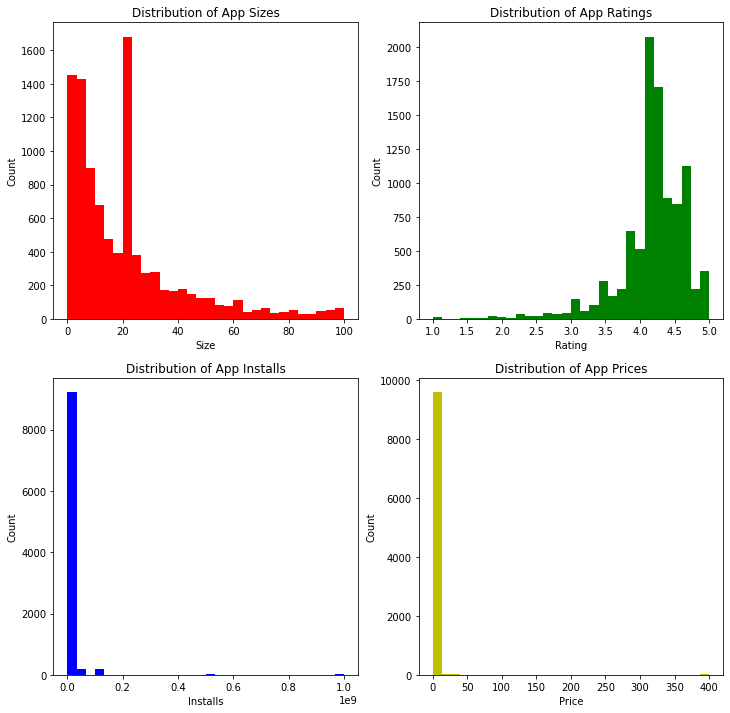

In [31]:
# Output :-

### 3.10 Create a pie chart to visualize the categories.

- Take the top 10 apps.
- autopct parameter is '%1.1f%%'.

In [ ]:
# Write your code here

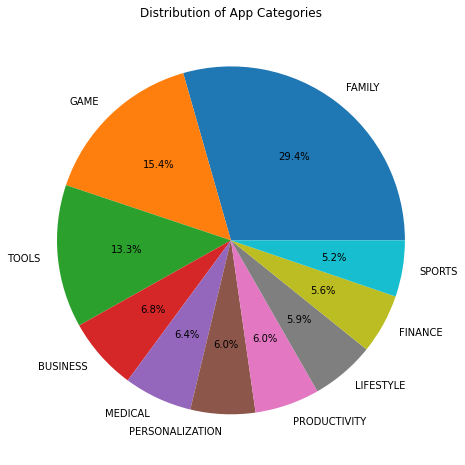

In [32]:
# Output :-

### 3.11 Pie chart of the distribution of content ratings.

- Do not take into account the Unrated value.
- So, the number of values are 5 (Everyone, Teen, Mature 17+, Everyone 10+, Adults only 18+).
- The figure size is 8 by 8.
- Enable the shadow parameter.
- Same as the pie chart before.
- The explode parameter is = [0.25, 0.15, 0, 0, 0].

In [ ]:
# Write your code here

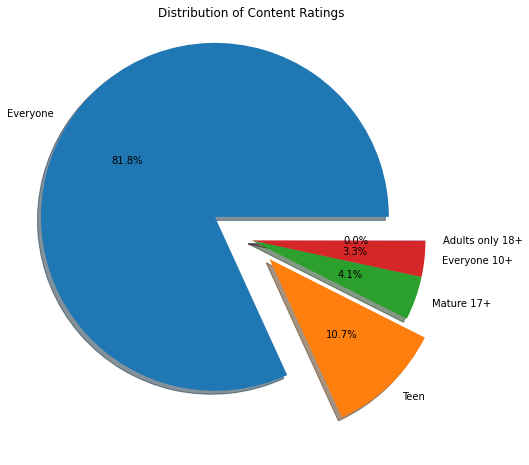

In [33]:
# Output :-

### 3.12 Create two Box plots in the same figure for Type column

- Based on the number of installs.
- The figure size is 10 by 6.
- Log the y axis by using plt.yscale() method.

In [ ]:
# Write your code here

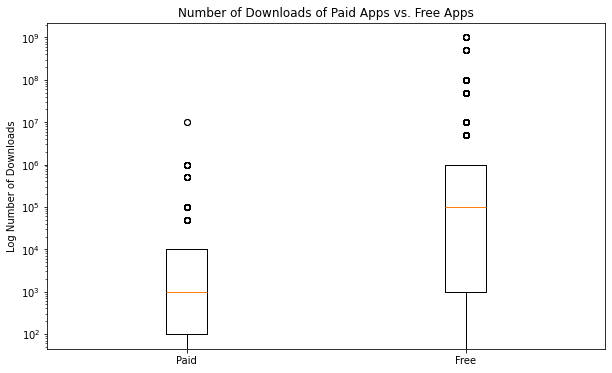

In [34]:
# Output :-